In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

합성곱 신경망(Convolution Neural Network, CNN)

합성곱 신경망은 흔히 CNN이라고 부르는 방법으로 합성곱이라는 연산을 사용하는 신경망이다. CNN은 실제 여러 분야에서 사용되는 방법으로 특히 이미지 분류 작업에서 좋은 성능을 보여준다.

합성곱 연산은 아래와 같은 연산을 의미한다.

$$y(i) = (x \times w)(i) = \sum_{k=-\infty}^{-\infty} x(k)w(i - k)$$

위 식은 $i$ 시점에서의 입력 데이터 $x$값과 가중치 $w$값의 합성곱 연산의 결과는 $y(i)$와 같음을 나타낸다. 위 식석에서도 $k$도 시점을 의미하는데, 가중치 $w$의 시점은 $w(i)$가 아닌 $w(i - k)$임을 알 수 있다. 이를 플립(flip)이라고 하며 가중치 커널(kernel)이라고도 부른다. 플립은 우리말로 하면 '뒤집다'라는 뜻으로 가중치의 시점을 뒤집는다는 뜻이다. 위 식은 시점의 순서와 상관없이 결과가 동일하므로 아래와 같이 쓸 수도 있다.

$$y(i) = (x \times w)(i) = \sum_{k=-\infty}^{-\infty} x(i - k)w(k)$$

패딩(Padding)  
패딩은 입력 데이터 주변을 특정 값으로 채우는 것을 의미한다.

<img src="./images/cnn_1.png/" width="500"/>

신경망에 커널을 적용하면 층이 깊어질수록 데이터의 차원은 점점 줄어든다. 4 * 4 차원의 입력 데이터에 2 * 2 커널을 합성곱했을 때 출력 데이터의 차원은 3 * 3으로 입력 데이터보다 출력 데이터가 줄어든다. 이렇듯, 입력 데이터에 커널을 합성곱한 후 출력 데이터의 차원이 줄어드는 현상을 방지하기 위해서 패딩이라는 방법을 사용한다.

스트라이드(Stride)  
스트라이드는 한 번 합성곱 연산을 한 후 다음 계산 영역을 선택할 때 얼마나 이동할지 간격을 정하는 것이다.

<img src="./images/cnn_2.png/" width="400"/>

스트라이드 2를 적용한 후 합성곱 연산을 한 결과를 스트라이드 1때와 비교해 보면 출력 데이터 행렬의 차원이 더 적은 것을 알 수 있다.

풀링(Pooling)  
풀링은 데이터의 차원을 줄이는 방법이다.

<img src="./images/cnn_3.png/" width="300"/>

맥스 풀링이란 해당 영역에서 가장 큰 값을 선택하는 방법이다.

합성곱 신경망 실습  
합성곱 신경망을 이용해 손글씨 인식 모델을 생성해본다.

In [2]:
# 일관된 결과값이 나오도록 random seed를 설정한다.
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [11]:
# 데이터 불러오기
from tensorflow.keras import datasets # 텐서플로우가 제공하는 데이터셋을 사용하기 위해 import 한다.
# mnist 손글씨 데이터는 트레이닝 데이터와 테스트 데이터가 나눠서 저장되어 있다.
# load_data() 메소드는 (트레이닝 피쳐 데이터, 트레이닝 타겟 데이터)와 (테스트 피쳐 데이터, 테스트 타겟 데이터)를
# 튜플 형태로 묶서러 리턴한다.
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data() # 손글씨 데이터셋을 피쳐, 타겟 데이터로 저장한다.

In [15]:
# 오리지널 데이터 확인
# 트레이닝 피쳐 데이터의 차원을 확인하면 (이미지 개수, 행, 열) 형태로 나온다.
# 즉, 트레이닝 피쳐 데이터는 28행 * 28열의 이미지 60,000개로 구성되어 있는 것을 알 수 있다.
print(X_train.shape)
print(y_train.shape) # 트레이닝 타겟 데이터는 스칼라값 60,000개로 이루어진 벡터이다.
print(X_test.shape) # 테스트 피쳐 데이터는 28행 * 28열의 이미지 60,000개로 구성되어 있는 것을 알 수 있다.
print(y_test.shape) # 테스트 타겟 데이터는 스칼라값 10,000개로 이루어진 벡터이다.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


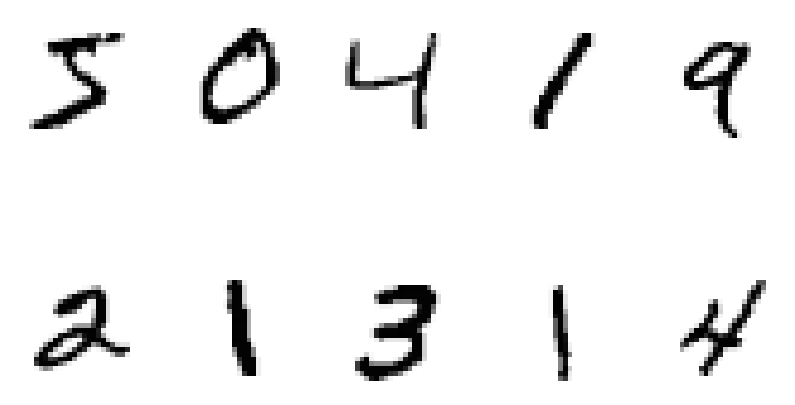

[5 0 4 1 9 2 1 3 1 4]


In [20]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape((28, 28)), cmap='Greys')
    plt.axis('off')
plt.show()
print(y_train[:10])